In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [24]:
def dft(x, N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x[:N])
    return X

[3.9864000000306987, 14.28170000008322, 53.74970000002577, 232.7924000001076, 1006.2517999999727, 3097.088099999837, 12695.200600000135] [0.10510000038266298, 0.08699999989403295, 0.17149999985122122, 0.3289999999651627, 0.1907000000755943, 0.4421999997248349, 0.3400000000510772]


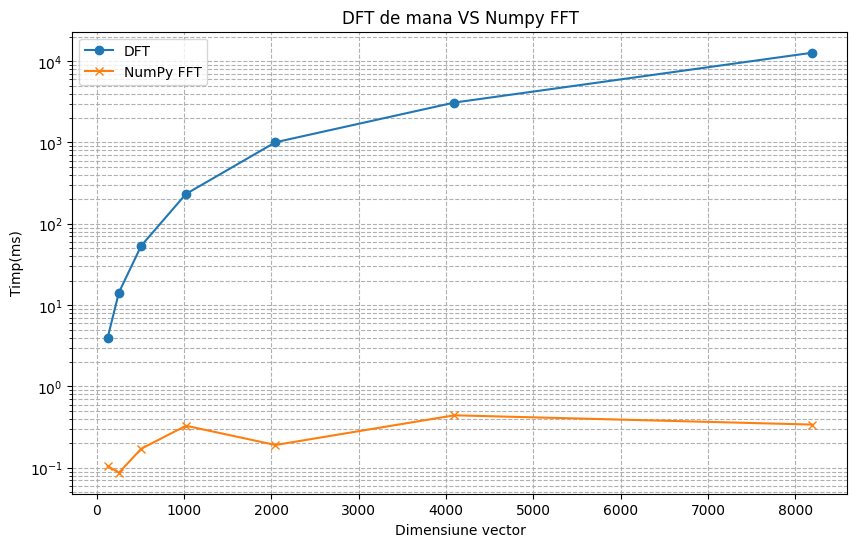

In [25]:
N = [128, 256, 512, 1024, 2048, 4096, 8192]

dft_times = []
fft_times = []


for n in N:
    x = np.random.random(n)  

    start_time = time.perf_counter()
    dft = dft(x, n)
    dft_times.append((time.perf_counter() - start_time) * 1000.0)

    start_time = time.perf_counter()
    np_fft = np.fft.fft(x)
    fft_times.append((time.perf_counter() - start_time) * 1000.0)

print(dft_times, fft_times)

plt.figure(figsize=(10, 6))
plt.plot(N, dft_times, label='DFT', marker='o')
plt.plot(N, fft_times, label='NumPy FFT', marker='x')

plt.yscale('log')

plt.xlabel('Dimensiune vector')
plt.ylabel('Timp(ms)')
plt.title('DFT de mana VS Numpy FFT')
plt.legend()

plt.grid(True, which="both", ls="--")

plt.show()


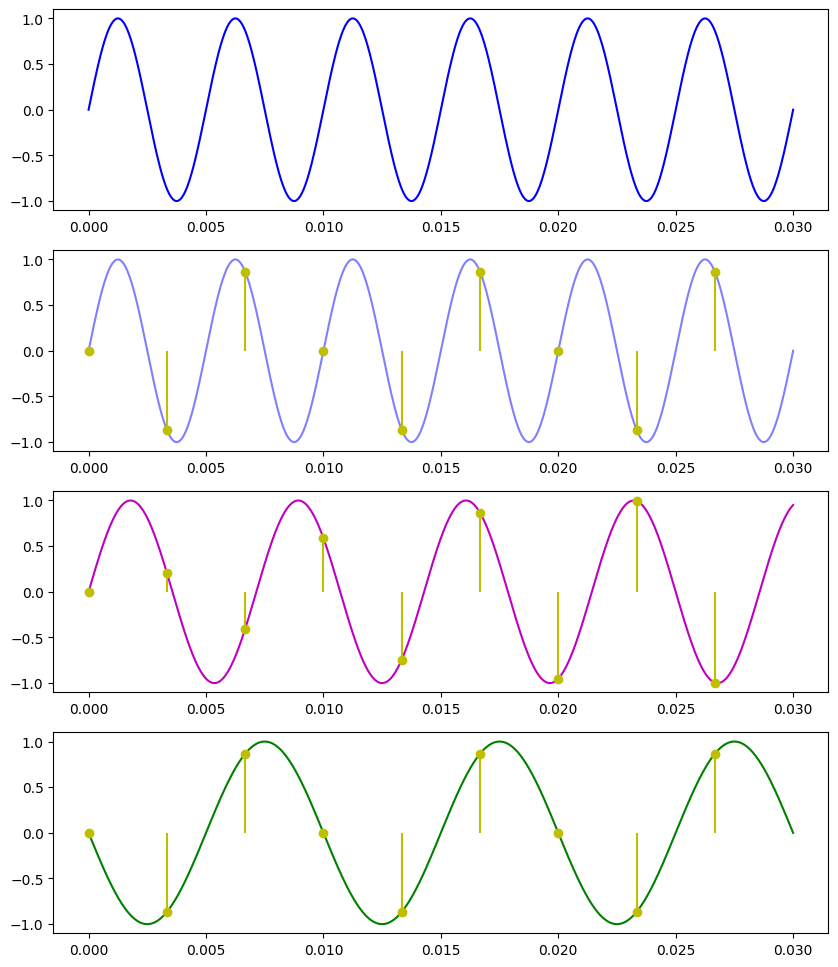

<Figure size 1000x800 with 0 Axes>

In [39]:
import numpy as np
import matplotlib.pyplot as plt

f = 200  
t = np.linspace(0, 0.03, 1000)  
y = np.sin(2 * np.pi * f * t)  

fs = 300  
ts = np.arange(0, 0.03, 1/fs)  
ys = np.sin(2 * np.pi * f * ts)  


f1 = f - fs/5
f2 = f - fs
y1 = np.sin(2 * np.pi * f1 * t)
y2 = np.sin(2 * np.pi * f2 * t)


fig, ax = plt.subplots(4,1,figsize=(10,12))
plt.figure(figsize=(10, 8))

ax[0].plot(t, y, 'b')

ax[1].plot(t, y, 'b', alpha=0.5)
ax[1].stem(ts, ys, 'y', basefmt=" ")

ax[2].plot(t, y1, 'm')
ax[2].stem(ts, np.sin(2 * np.pi * f1 * ts), 'y', basefmt=" ")
ax[3].plot(t, y2, 'g')
ax[3].stem(ts, np.sin(2 * np.pi * f2 * ts), 'y', basefmt=" ")

plt.show()